In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Problems with accuracy and unbalanced data

In [2]:
def plot_confusion_matrix(values, xlabel="predicted labels", ylabel="true labels", xticklabels=None,
                          yticklabels=None, cmap=None, vmin=None, vmax=None, ax=None,
                          fmt="{:.2f}", xtickrotation=45, norm=None):
    """Plot a matrix as heatmap with explicit numbers.
    Parameters
    ----------
    values : ndarray
        Two-dimensional array to visualize.
    xlabel : string, default=""
        Label for the x-axis.
    ylabel : string, default=""
        Label for the y-axis.
    xticklabels : list of string or None, default=None
        Tick labels for the x-axis.
    yticklabels : list of string or None, default=None
        Tick labels for the y-axis
    cmap : string or colormap
        Matpotlib colormap to use.
    vmin : int, float or None
        Minimum clipping value.
    vmax : int, float or None
        Maximum clipping value.
    ax : axes object or None
        Matplotlib axes object to plot into. If None, the current axes are
        used.
    fmt : string, default="{:.2f}"
        Format string to convert value to text.
    xtickrotation : float, default=45
        Rotation of the xticklabels.
    norm : matplotlib normalizer
        Normalizer passed to pcolor
    """
    import matplotlib.pyplot as plt
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(values, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
    # this will allow us to access the pixel values:
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xlim(0, values.shape[1])
    ax.set_ylim(0, values.shape[0])

    if xticklabels is None:
        xticklabels = [""] * values.shape[1]
    if yticklabels is None:
        yticklabels = [""] * values.shape[0]

    # +.5 makes the ticks centered on the pixels
    ax.set_xticks(np.arange(values.shape[1]) + .5)
    ax.set_xticklabels(xticklabels, ha="center", rotation=xtickrotation)
    ax.set_yticks(np.arange(values.shape[0]) + .5)
    ax.set_yticklabels(yticklabels, va="center")
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            # pixel bright: use black for number
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt.format(value), color=c, ha="center", va="center")
    ax.invert_yaxis()
    return ax

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))

[[49  4]
 [ 5 85]]
0.937062937063


In [4]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

In [5]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


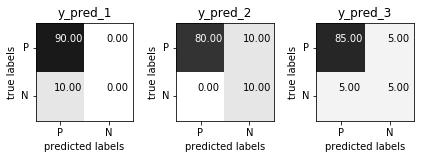

In [6]:
fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,
                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)
    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

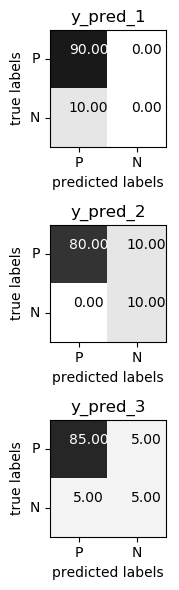

In [7]:
fig, axes = plt.subplots(3, dpi=100, figsize=(3, 6))

for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):

    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,

                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)

    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

In [8]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95        90
          1       0.00      0.00      0.00        10

avg / total       0.81      0.90      0.85       100

             precision    recall  f1-score   support

          0       1.00      0.89      0.94        90
          1       0.50      1.00      0.67        10

avg / total       0.95      0.90      0.91       100

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        90
          1       0.50      0.50      0.50        10

avg / total       0.90      0.90      0.90       100



/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1140: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# logistic regresson on breast cancer, but change threshold:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.92      0.92        53
          1       0.96      0.94      0.95        90

avg / total       0.94      0.94      0.94       143



In [10]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        53
          1       1.00      0.89      0.94        90

avg / total       0.94      0.93      0.93       143



# Precision recall curves

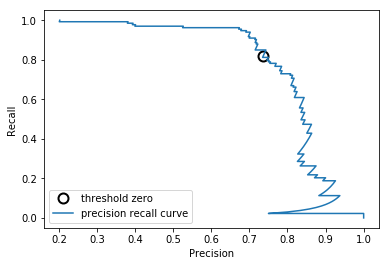

In [11]:
# this will look different on master, I'm using a branch with a bugfix!

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve

X, y = make_blobs(n_samples=(2500, 500), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

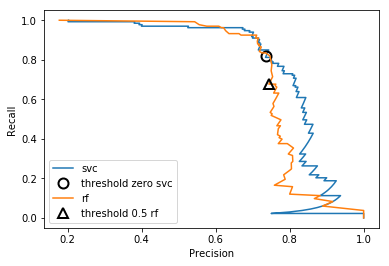

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# F1 vs average precision

In [13]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(
      f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.711
f1_score of svc: 0.776


In [14]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.770
Average precision of svc: 0.813


# ROC CURVE

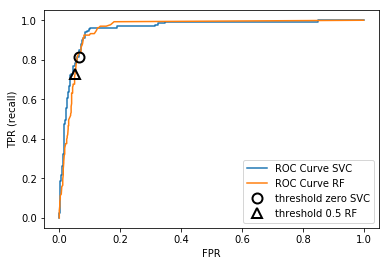

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

close_zero = np.argmin(np.abs(thresholds))

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

# Multi-class

In [32]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.964
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  1  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  2  0  0  1 44]]


In [33]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      0.95      0.93        43
          2       0.98      1.00      0.99        44
          3       1.00      0.96      0.98        45
          4       0.97      0.97      0.97        38
          5       0.94      0.98      0.96        48
          6       0.98      0.98      0.98        52
          7       0.98      0.98      0.98        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.96      0.96      0.96       450



In [42]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, pred, average='micro'), recall_score(y_test, pred, average='weighted')

(0.96444444444444444, 0.96444444444444444)

# with cross-validation

In [43]:
X = digits.data / 16.   # data is between 0 and 16
# 9 vs rest
y = digits.target == 9

# default scoring for classification is accuracy
scores_default = cross_val_score(SVC(), X, y)

# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), X, y, scoring="accuracy")

# using ROC AUC
roc_auc =  cross_val_score(SVC(), X, digits.target == 9, scoring="roc_auc")

print("Default scoring: {}".format(scores_default))
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
print("AUC scoring: {}".format(roc_auc))

Default scoring: [ 0.953  0.953  0.962]
Explicit accuracy scoring: [ 0.953  0.953  0.962]
AUC scoring: [ 0.986  0.982  0.969]


In [44]:
from sklearn.metrics.scorer import SCORERS
print("\n".join(sorted(SCORERS.keys())))

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
brier_score_loss
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
log_loss
mean_absolute_error
mean_squared_error
median_absolute_error
mutual_info_score
neg_log_loss
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
v_measure_score


In [45]:
def few_support_vectors(est, X, y):
    acc = est.score(X, y)
    frac_sv = len(est.support_) / np.max(est.support_)
    # I just made this up, don't actually use this
    return acc / frac_sv

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
print(len(grid.best_estimator_.support_))

{'C': 10.0, 'gamma': 0.074239049740163321}
0.991111111111
498


/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10, scoring=few_support_vectors)
grid.fit(X_train, y_train)
print(grid.best_params_)
print((grid.predict(X_test) == y_test).mean())
print(len(grid.best_estimator_.support_))

{'C': 100.0, 'gamma': 0.0074239049740163323}
0.977777777778
405


/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Regression metrics

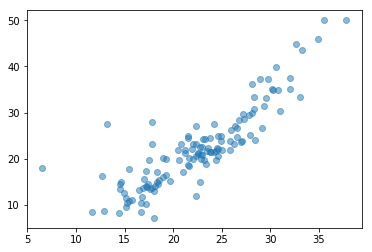

In [58]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

ridge = Ridge(normalize=True).fit(X_train, y_train)
pred = ridge.predict(X_test)
plt.plot(pred, y_test, 'o', alpha=.5)

Text(0,0.5,'true')

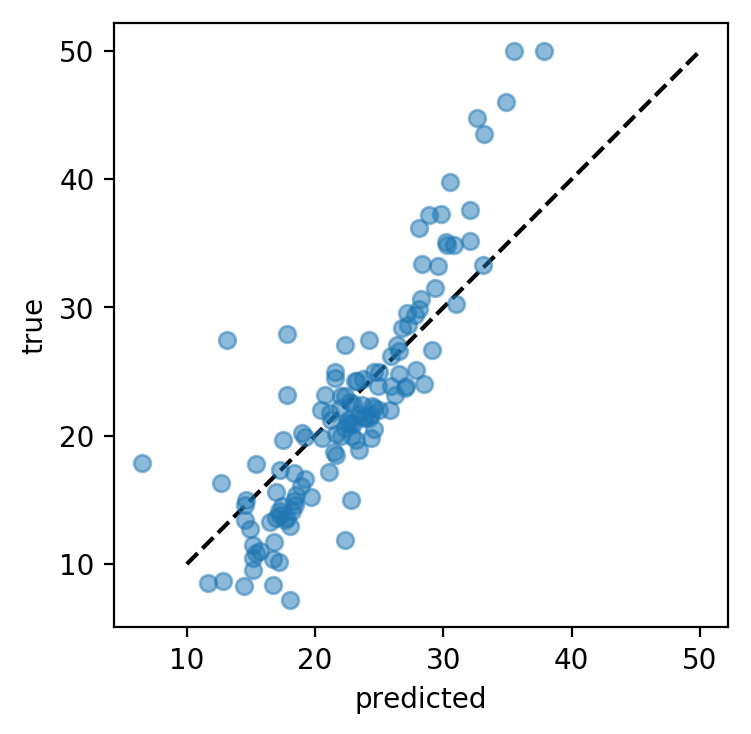

In [59]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([10, 50], [10, 50], '--', c='k')
plt.plot(pred, y_test, 'o', alpha=.5)
plt.xlabel("predicted")
plt.ylabel("true")

Text(0,0.5,'predicted')

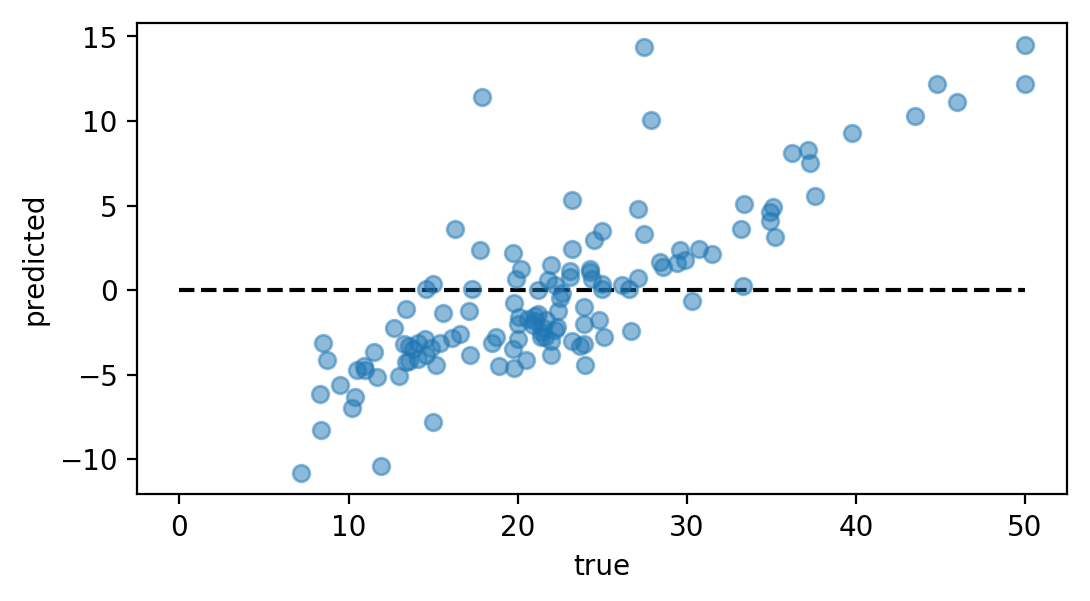

In [60]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([0, 50], [0, 0], '--', c='k')
plt.plot(y_test, y_test - pred, 'o', alpha=.5)
plt.xlabel("true")
plt.ylabel("predicted")

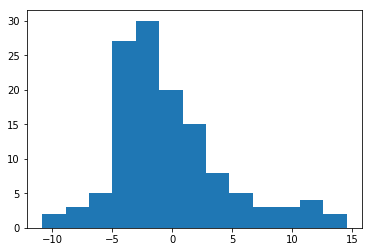

In [61]:
plt.hist(y_test - pred, bins="auto");

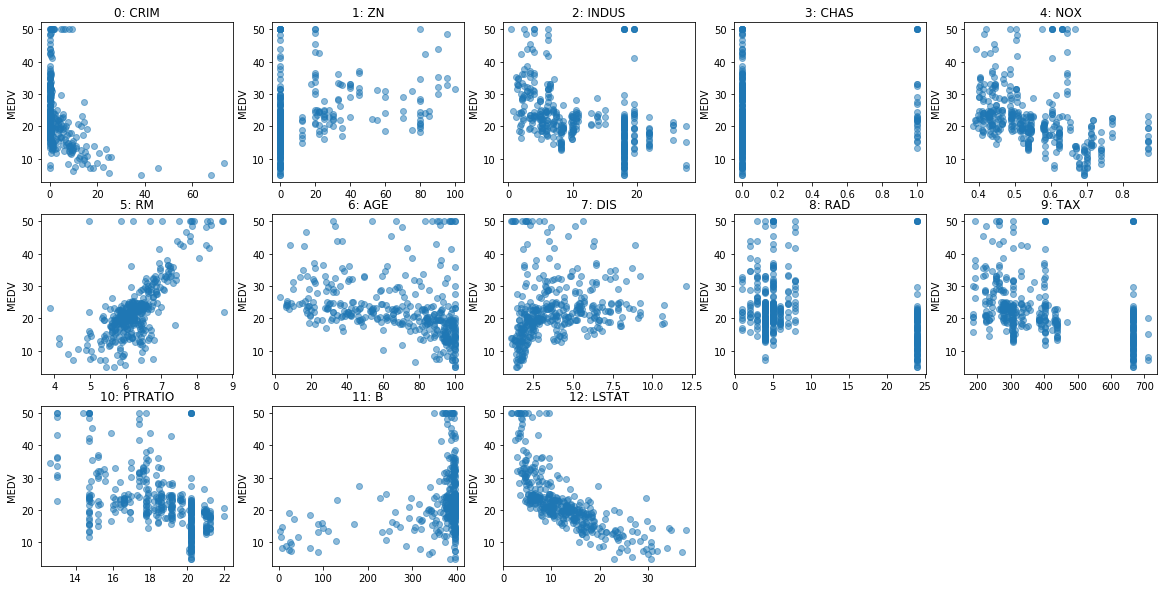

In [62]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_train[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
plt.savefig("images/target_vs_feature")

In [63]:
np.abs(y_test - pred)

array([  1.107,   1.227,   2.395,   4.078,   3.441,   0.3  ,   4.079,
         8.293,   3.849,   3.303,   3.637,  10.295,   1.398,   1.741,
         0.006,   2.616,  14.357,   3.47 ,   0.644,   3.217,   1.568,
         1.819,   4.453,   5.349,   0.756,   4.726,   0.612,   2.755,
         6.952,   1.134,  11.095,   2.439,   2.371,   0.646,   3.107,
         1.247,  10.055,   3.137,   4.612,   0.155,   4.234,   3.605,
         4.918,   5.638,   3.011,  12.183,   2.261,   4.781,   3.147,
         4.504,   5.064,   3.005,   2.779,   1.538,   2.223,  10.819,
         7.775,   4.208,   4.11 ,   8.108,   2.814,  10.395,   2.419,
         1.766,   9.268,   1.738,   1.224,   3.473,   0.049,   0.995,
         3.181,   6.143,   0.293,   2.876,   3.484,   8.287,   2.984,
         2.071,   3.821,   2.886,   0.386,   5.121,  11.393,   4.699,
         0.725,   0.067,   4.518,   1.797,   1.224,   0.671,   0.455,
         2.434,   1.63 ,   2.381,   0.042,   0.377,   2.239,   2.001,
         3.324,   0.

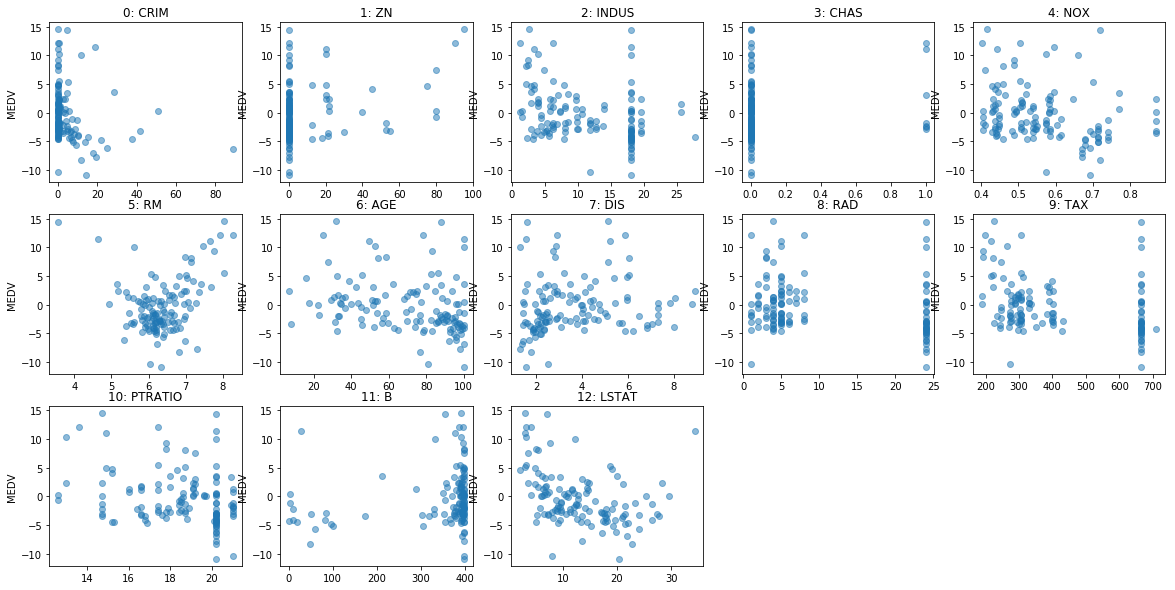

In [64]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_test[:, i], y_test - pred, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
    plt.savefig("images/residual_vs_feature")

# MAPE

In [ ]:
def mape(y_true, y_pred):
    return 100 * np.abs((y_true - y_pred) / y_true).mean()

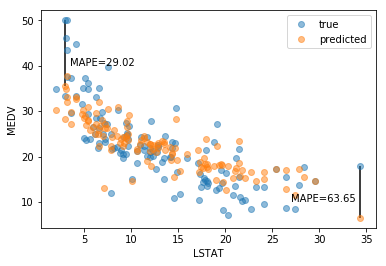

In [112]:
plt.plot(X_test[:, -1], y_test, 'o', alpha=.5, label="true")
plt.plot(X_test[:, -1], pred, 'o', alpha=.5, label='predicted')
plt.ylabel("MEDV")
plt.xlabel("LSTAT")
inds = np.argsort(X_test[:, -1])
last = inds[-1]
other = inds[1]

plt.text(27, 10, "MAPE={:.2f}".format(mape(y_test[last], pred[last])))
plt.errorbar(X_test[last, -1], y_test[last], fmt='none', yerr=([y_test[last] - pred[last]], [0]), c='k')
plt.text(3.5, 40, "MAPE={:.2f}".format(mape(y_test[other], pred[other])))
plt.errorbar(X_test[other, -1], y_test[other], fmt='none', yerr=([y_test[other] - pred[other]], [0]), c='k')

plt.legend()
plt.savefig("images/mape.png")

In [84]:
mape(y_test, pred)

19.532308189864956

In [86]:
y_test[inds[-1]], pred[inds[-1]]

(17.899999999999999, 6.507071612445408)

In [87]:
mape(y_test[inds[-1]], pred[inds[-1]])

63.647644623210006

In [89]:
y_test[inds[1]], pred[inds[1]]

(50.0, 35.487947702414971)

In [90]:
mape(y_test[inds[1]], pred[inds[1]])

29.024104595170058